In [3]:
import pandas as pd # Importing things for use.
import numpy as np
import matplotlib.pyplot as plt

# A Perceptron

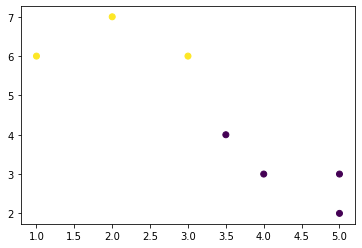

In [99]:
# Can try two different arrangements of x
#x = np.array([[1,2], [3,6], [4,7], [5,6], [1,3], [2.5,4], [2,3]])
x = np.array([[5,2], [3,6], [2,7], [1,6], [5,3], [3.5,4], [4,3]])
y_orig = np.array([-1,1,1,1,-1,-1, -1])

plt.scatter(x[:,0], x[:,1], c = y_orig)
#plt.xlim([0,6])
#plt.ylim([0,12])

In [100]:
y_orig

array([-1,  1,  1,  1, -1, -1, -1])

In [101]:
## Perceptron 
L = y_orig.size # Length of y(input) vector

X1 = x[:,0].reshape(L,1) # Separate X1 and X2 to see the algorithm clearly
X2 = x[:,1].reshape(L,1)
y=y_orig.reshape(L,1)

w0, w1, w2 = 1, 0, 0 # Creating our weights, start at 0 for 1st iteration

count = 0 # Counter to go through each point
iteration = 1 # Number of iterations. We will just do a fixed number of iterations here
alpha = 0.01 # Learning rate
while(iteration < 1000):
    y_pred =  w0 + w1 * X1 + w2 * X2 # The current prediction 
    prod = y_pred * y # Calculate product to see whether prediction is correct (If >1, the prediction is correct)
    for val in prod: # go through all of product
        if(val <= 1):# if the prediction incorrect
            w0 = w0 + alpha * y[count] # nudge w vector in right direction
            w1 = w1 + alpha * y[count] * X1[count] 
            w2 = w2 + alpha * y[count] * X2[count]

        count += 1
    count=0
    iteration += 1

print('w0',w0)
print('w1',w1)
print('w2',w2)

y = w0 + w1*X1 + w2*X2 # Final perceptron answers (less than 0 is category 1, greater than 0 is category 2)

w0 [0.8]
w1 [-1.305]
w2 [0.69]


Text(0, 0.5, '$X_{2}$')

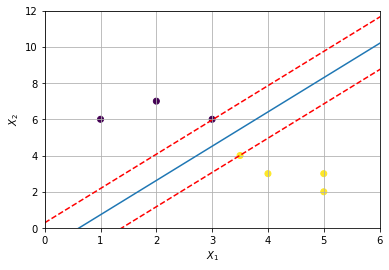

In [102]:
# Plot the predictions. 
plt.scatter(x[:,0], x[:,1], c = (y<0).reshape(1,-1)[0] ) #c=color, which is the class(greater or less than 0)

# Plot the line
q = np.array([0,7]) # 2 points on x axis.
x_ = -(w1/w2).reshape(1,-1)*q - w0/w2 # Calculated hyperplane (a line)

x_p = -(w1/w2).reshape(1,-1)*q - w0/w2 - 1/w2 # f(x) = w.x+b+1 support vector line
x_n = -(w1/w2).reshape(1,-1)*q - w0/w2 + 1/w2 # f(x) = w.x+b+1 support vector line

plt.plot(q, x_[0])
plt.plot(q, x_p[0], 'r--')
plt.plot(q, x_n[0], 'r--')
plt.xlim([0,6])
plt.ylim([0,12])
plt.grid()
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')

# Scikitlearn Linear SVC
Works better than our Perceptron

In [94]:
# Compare the Scikitlearn support vector classifier to our perceptron. It should do at least as well as our perceptron
# API doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

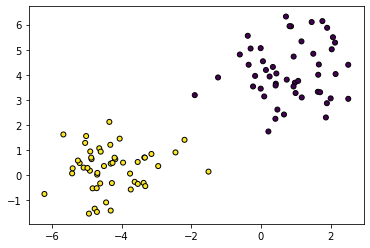

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

x, y = make_blobs(n_features=2, centers=2, n_samples=100, random_state=3)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')



In [96]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC(C=1,tol=1e-8 ,max_iter=1e5).fit(x,y)
predictions = svm_classifier.predict(x)

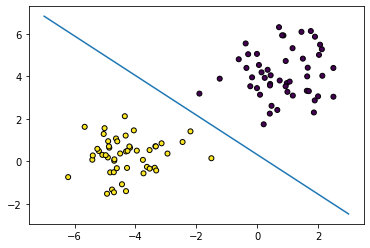

In [97]:
plt.scatter(x[:, 0], x[:, 1], marker='o', c=predictions,
            s=25, edgecolor='k')

w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-7, 3)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]
plt.plot(xx,yy)

## With Overlapping Points

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


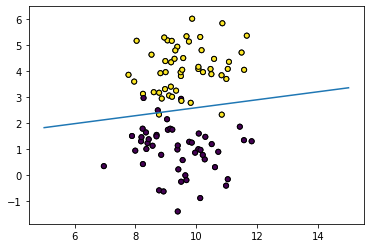

In [98]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

x, y = make_blobs(n_features=2, centers=2, n_samples=100, random_state=4)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

from sklearn.svm import LinearSVC
svm_classifier = LinearSVC().fit(x,y)
predictions = svm_classifier.predict(x)

plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, # c=predictions,
            s=25, edgecolor='k')

w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 15)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]
plt.plot(xx,yy)